<p align="center">
  <img src="img/GMITLOGO.jpg" width="500"/></p>

# GMIT, H.Dip in Data Analytics, Fundamentals of Data Analysis Assignment 2018

## 1. Introduction

This repository contains all of the files pertaining to my 2018 assignment submission for the Fundamentals of Data 
Analysis module of the GMIT H.Dip program in Data Analytics. All of the work within this repository was carried out over the course of a 4 week period in October and November 2018. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project Objectives

The objective of the assignement is to carry out some research into the "Anscombe's Quartet" data set[2]. The data set is to be analysed in this notebook. There are four main tasks in the assignment[3]:

1. Explain the background to the dataset – who created it, when it was created, and any speculation you can find regarding how it might have been created.
1. Plot the interesting aspects of the dataset.
1. Calculate the descriptive statistics of the variables in the dataset.
1. Explain why the dataset is interesting, referring to the plots and statistics above.


## 2. Background to the Anscombe's Quartet Data Set

The Anscombe Quartet data set was first published by Francis Anscombe in 1973 [5]. Anscombe was a British statistician who studied maths at Cambridge and worked for the Ministry of Supply during World War 2 on statistical issues relating to quality control. Following the war he returned to Cambridge where he was active in statistical research. In 1955 he moved to moved to America where he worked at both Princeton and Yale. It was at Yale where he developed an interst in statistical computing, where he drew upon his background in sampling of inspections for industrial quality control, the foundations of probability and analysis of variance [6]. He published a text on the subject "Computing in Statistical Science Through APL". (APL - A Programming Language!)  

<p align="center">
  <img src="img/anscombe.jpeg" width="200" /></p>
 <p style="text-align: center;"> <b><I>Frank Anscombe</I></b> </p>  
  
 Anscombe cautioned against misdiagnosis and the misapplication of computer models, without fully understanding a data set. To this end he created the Anscombe's Quartet data set to demonstrate 4 completely different functions which all have the same underlying descriptive statistics (mean, standard deviation, linear regression line etc.), but when plotted - they can be seen to be completely different. At the time that the data set was developed, many statisticians believed that graphs were imprecise and that descritive statistics were a better way to fully define what was going on in a set of data. Anscombe disagreed with this and created the quartet to show the benefits of data visualisation believeing that both descriptive data and graphs contributed to the understanding of a data set.
 
 Anscombe never documented how he came up with the data sets, so it has been left to speculation as to how he did it. According to Matejka and Fitzmaurice, the effectiveness of the quartet is not just that the 4 data sets have similar descriptive statistics, rather that they have similar descriptive statistics *and* that they are so very distinct visually. In their paper titled "*Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing*" [7] - they illustarted this point using the graphic shown below:
 
 <p align="center">
  <img src="img/img2.png" width="700" /></p>
  
  In Anscombe's Quartet on the left, the 4 data sets are strikingly different, whereas in the unstructured data set on the right they are visually similar. In this paper, the researchers looked to create an algorithm for generating such data sets as Anscombe's. They believed that while it is relatively difficult to create a new data set from scratch that had similar descritive statistics but was very different visually, it would be relatively easy to take an existing data set and modify it slightly while maintaining those statistical properties. 
  
 Matejka and Fitzmaurice designed an iterative algorithm that would take an existing data set and modify it slighly each time, checking that the descriptive statistics were still the same. Adrian Coyler [8] has posted and excellent explaination of how this was carried out [here](https://blog.acolyer.org/2017/10/31/same-stats-different-graphs-generating-datasets-with-varied-appearance-and-identical-statistics-through-simulated-annealing/). Coyler explains the algorithm used in psuedocode as follows:
   
   <p align="center">
  <img src="img/img3.png" width="450" /></p>
  
 
 Where:
 * *Initial_ds* is the original dataset
 * *Perturb* is a function that modifies the original data set slightly in a random way, note that it has a temp parameter - which represents a tempterature used in *Simulated Annealing*
 * The *Fit* function checks whether on not the *Perturb* function has improved the overall fitness and accepts or rejects the perturbation as appropriate
 * The newly return Perturbation is checked to see if the statistical properties are similar (as defined to within 2 decimal places) and if so the test data set becomes the current data set until the next iteration
 
 When carrying out iterative optimisations such as this there is always a risk that the alogorithm will being to converge around a good solution (a local optimum) that isn't the best solution (the global optimum)[9]. One method to try and prevent this is called *Simulated Annealing*. This is named after the metalugic principle of annelaing method whereby the crystalline structure in the metal changes gradually as heated metal cools down. As the temperature of the metal cools slowly, the crystals are allowed to grow in size resulting in a tougher material. Simulated annealing introduces a temperature variable to the algorithm. This variable is initially set high and allowed to "cool" as the algorithm runs more times. The algorithm is designed in such a way that it allows worse solutions and these are accepted based on the value of the temp variable. As the temperature of the algorithm reduces so does the chance of a worse solution being accepted. But the principle allows the alogorithm to shake itself out of possiblt converging around the wrong optimum.  
 
  In order to ensure that the resulting plots are visually distinct they created some biases in the random modifications to move the points towards some prefered shapes. In the course of this reseach the team were able to move data poins from a dinosaur shape through many others such as X's, straight lines and ovals. Examples of how the data set developed are shown here [8]:
  
 <p align="center">
  <img src="img/img4.png" width="450" /></p>
  
  It is possible that Anscombe used a similar method while creating his dataset. 

## 3. Plots of the Anscombe's Data Sets

In this section, quartet of data sets will be analysed by use of visual plots. 
Before analysing the data set it must first be downloaded. It is widely available on the internet, for this assignment it was downloaded from [here] (https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/anscombe.csv).Note that the data set was modified slightly to remove a column which contained point numbers. The plots will be created using the subplot function of the matplotlib library [10] for Python. The first step is to import the required libraries.

In [2]:
# Import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# Import stats to calculate the properties of the best fit line in the data sets
from scipy import stats

The next step is to load the data set. 

In [3]:
# Load the data set from the local .csv file
df = pd.read_csv('data/anscombes.csv')
# Print the data set to ensure that it has loaded properly
print(df)

    x1  x2  x3  x4     y1    y2     y3     y4
0   10  10  10   8   8.04  9.14   7.46   6.58
1    8   8   8   8   6.95  8.14   6.77   5.76
2   13  13  13   8   7.58  8.74  12.74   7.71
3    9   9   9   8   8.81  8.77   7.11   8.84
4   11  11  11   8   8.33  9.26   7.81   8.47
5   14  14  14   8   9.96  8.10   8.84   7.04
6    6   6   6   8   7.24  6.13   6.08   5.25
7    4   4   4  19   4.26  3.10   5.39  12.50
8   12  12  12   8  10.84  9.13   8.15   5.56
9    7   7   7   8   4.82  7.26   6.42   7.91
10   5   5   5   8   5.68  4.74   5.73   6.89


The data set has been loaded and checked, so the next step is to plot the data. While researching how this is to be done, I discovered style sheets in matplotlib which can be used to make the plot look a bit more modern. I used the *ggplot* style (recommended in the documentation)[11] to format the grids in the plots. I also used stackoverflow to learn how to resize the subplots as the defaults were quite small and hard to read [12]. Then, I learned how to plot the linear regression lines using the *stats* module from the *scipy* package [13]. Finally, I rewrote the code using a function for the subplots to tidy up the code and halving the number of lines required.

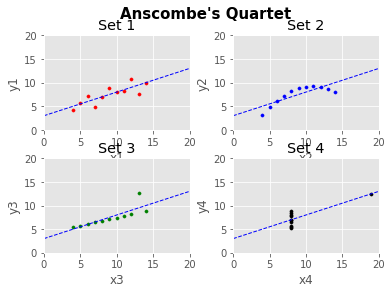

In [4]:
# Add a title to the plot
plt.suptitle("Anscombe's Quartet", fontsize=15, fontweight='bold')
# Tidy up the plots - use more modern formatting (https://matplotlib.org/users/style_sheets.html)
plt.style.use('ggplot')

# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [14, 14]

# Define a function to create a 2 x 2 subplot and call it for each plot in the quartet
def sub_plot2x2(x, y, pos, title, colour):
    # Plot the set
    plt.subplot(2, 2, pos, xlim=(0,20), ylim=(0,20), xlabel=(x), ylabel=(y), title=title)
    plt.scatter(df.loc[:, x], df.loc[:, y],c=colour, label=title, s=10)
    plt.grid(True)
    # Calculate the linear statistics using stats.linregress()
    slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, x], df.loc[:, y])
    # Create a range of x values from 0 to 20 (the size of the plot)
    x_vals = np.arange(0,20.1,0.1)
    # Calculate the y values using the slope and intercept calculted
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, 'b-', linestyle='dashed',linewidth=1)

sub_plot2x2('x1', 'y1', 1, 'Set 1', 'red')  
sub_plot2x2('x2', 'y2', 2, 'Set 2', 'blue')
sub_plot2x2('x3', 'y3', 3, 'Set 3', 'green')
sub_plot2x2('x4', 'y4', 4, 'Set 4', 'black')

# Format the spacing between the 4 plots 
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

As demonstarted above - even though the 4 data sets are very different visually, the best fit line for the 4 data sets is exactly the same!

## 4. Calculation of the Descriptive Statistics

In this section we can take a look at the descriptive statistics of the data sets. There are two differents sets of statistics that need to be considered:
1. Summary data sets of the columns in the data sets (i.e. summary comparisons of the 'x' and 'y' data betwen the 4 sets.
1. Summaries of the relationships between each of the 'x-y' pairs

### Summary data sets of the columns in the data sets [14]
When statisticians want to compare to sets of similar data (e.g. house prices in differnet cities), they usually try to get an understanding of the *middle* of each data set and the *spread*. Where the middle gives an idea of what value a general data point in the set is likely to have, and the spread gives som indication of how close a data point is to this middle value. A commonly used measure for the middle of a data set is the *mean*, and the *standard deviation* can be used in conjunction with the mean to get a better feel for the data set.

Pandas has a built-in `describe()` function that can be used to summarise each column in the Anscombe data set:

In [5]:
# Use the built in pandas describe function to look at the relevant summary stats
df.describe().loc[['count','mean','std']]

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579


The output from the `describe()` function shows firstly that there are 11 data points in the data set as expected. Aside from that there are 4 interesting points in these summary statistics:
1. The mean value of the x column in all 4 data sets is identical (value is 9) 
1. The mean value of the y column in all 4 data sets is correct to 2 decimal places (approx 7.500)
1. The standard deviation of the x column in all 4 data sets is identical (value is 3.316625)
1. The standard deviation of the y column is all 4 data sets is similar (approx 2.031)

This is quite extraordinary considering how different each data set looks when plotted!

### Summaries of the relationships between the x-y pairs [15]

Another way to summarise a dataset is to look at the relationship or corelation between the columns in the dataset. This can be done by using linear regression to determine the slope and y intercept value of the line which best fits the data. Linear regression is an iterative process used to find the line which has the minimum total deviation from all of the data points in the set. There is a function `stats.linregress` in the Scipy package that can be used to calulate the slope and y-intercept values for the best fit line. These values are calculated for the each of the 4 data sets below:

In [6]:
# Calulate the correlation variables for each of the 4 data sets
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.loc[:, 'x1'], df.loc[:, 'y1'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(df.loc[:, 'x2'], df.loc[:, 'y2'])
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(df.loc[:, 'x3'], df.loc[:, 'y3'])
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(df.loc[:, 'x4'], df.loc[:, 'y4'])

# Print out the equations for the best fit lines for each data set
print("The equation for the best fit line for data set 1 is: y = " + str(round(slope1,2)) + 'x + ' + str(round(intercept1,2)))
print("The equation for the best fit line for data set 2 is: y = " + str(round(slope2,2)) + 'x + ' + str(round(intercept2,2)))
print("The equation for the best fit line for data set 3 is: y = " + str(round(slope3,2)) + 'x + ' + str(round(intercept3,2)))
print("The equation for the best fit line for data set 4 is: y = " + str(round(slope4,2)) + 'x + ' + str(round(intercept4,2)))


The equation for the best fit line for data set 1 is: y = 0.5x + 3.0
The equation for the best fit line for data set 2 is: y = 0.5x + 3.0
The equation for the best fit line for data set 3 is: y = 0.5x + 3.0
The equation for the best fit line for data set 4 is: y = 0.5x + 3.0


So the equations for the best fit lines for all 4 data sets is the exact same! Again this is quite amazing considering how different the 4 data sets look while plotting. There is another interesting statistic to be considered when discussing the Anscombe quartet. This is the *co-efficient of determination* and known as *R-squared*. The co-effiecent of determination for a linear regression problem is a measure of the *goodness of fit* in a regression model. Statisticians say that data fit a regression model well if the diferences between the observed data and the model are small. R-squared evaluates the scatter of the data around the regression line. Generally, the larger the value for R-squared, the better the data fit the model. The `stats.linregress` function has already calculated the R value for each data set, so we can square them and compare them for each set in the quartet.

In [7]:
# Print the R-squared value for each data set
print("The R-squared value for data set 1 is :" + str(round((r_value1**2),2)))
print("The R-squared value for data set 2 is :" + str(round((r_value2**2),2)))
print("The R-squared value for data set 3 is :" + str(round((r_value3**2),2)))
print("The R-squared value for data set 4 is :" + str(round((r_value4**2),2)))

The R-squared value for data set 1 is :0.67
The R-squared value for data set 2 is :0.67
The R-squared value for data set 3 is :0.67
The R-squared value for data set 4 is :0.67


The R-squared values for the 4 data sets in the quartet are identical, this means that the the linear regression model used fits all 4 data sets equally well - regarless of how they look when plotted.

## 5. Discussion and Conclusions

During the course of researching and analysing this data set, the following points of interest were apparent:

1. Linear regression is useful for describing the correlation between 2 variables when the data points are normally distributed about the best fit line.
1. There is not always a linear relationship between variables - other types of regression are available.
1. Data should be visualized in order to determine what the impacts of outliers are on the data set
1. If a data set has outliers, there might be more appropriate descriptive statistics that the mean and standard deviation


Each of these points will be discussed in turn, making reference to Anscombes quartet of data sets.

### 5.1 Linear Regression 

In section 3 of this assignment, when plotting the 4 data sets, linear regression was used to determine the best fit line for each of the 4 data sets. Linear regression is a method for finding the slope and y-intercept of the line which *best fits* the data in the set. In all 4 plots, regardless of the data, the best fit was calculated to be:
$$
y = 0.5x + 3.0
$$
Looking at the 4 plot generated, it is obvious that only in set 1 does this line really describe the best line to fit this data, because:
* 5 of the data points sit on, or very near the line
* 3 of the data points are above the line
* 3 of the data point are below the line
* The data is unbiased as the 3 points above the line, and the 3 points below the line are spread across the lenght of the line

In order to contextualise this, I will create a plot of the line described by:
$$
y = 0.5x + 3.0
$$
I will then plot some data points around this line using some normally distributed noise, so that this plot can be compared to the plot from set 1.


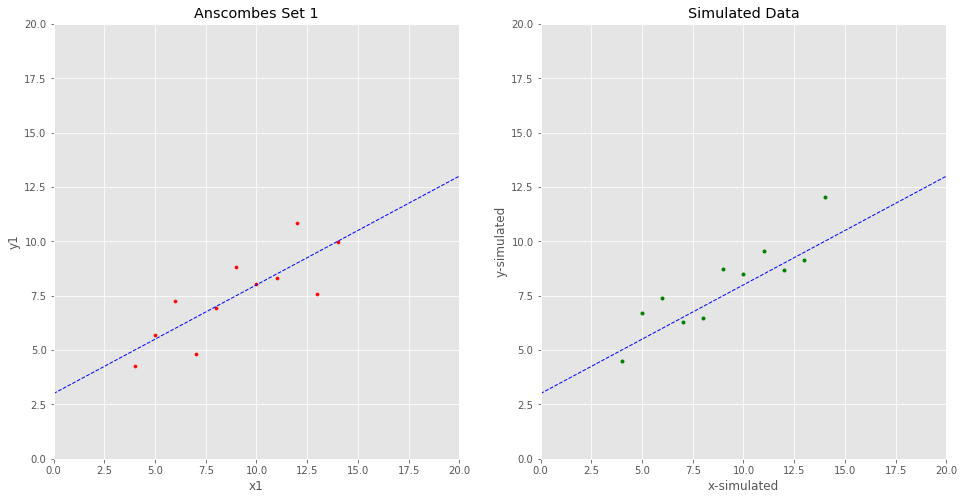

In [8]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [16, 8]

# Plot Set 1 from Anscombes Quartet as a subplot
# Plot the set
plt.subplot(1, 2, 1, xlim=(0,20), ylim=(0,20), xlabel=('x1'), ylabel=('y1'), title='Anscombes Set 1')
plt.scatter(df.loc[:, 'x1'], df.loc[:, 'y1'],c='red', label='Anscombes Set 1', s=10)
plt.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, 'x1'], df.loc[:, 'y1'])
# Create a range of x values from 0 to 20 (the size of the plot)
x_vals = np.arange(0,20.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, 'b-', linestyle='dashed',linewidth=1)

# Plot the line y = 0.5x + 3.0, as a sub plot
plt.subplot(1, 2, 2, xlim=(0,20), ylim=(0,20), xlabel=('x-simulated'), ylabel=('y-simulated'), title='Simulated Data')
# Create a range of x values from 0 to 20 (the size of the plot)
x_sim = np.arange(0,20.1,0.1)
# Calculate the y values and plot the line with a blue dashed line
y_sim = 0.5 * x_sim + 3.0
plt.plot(x_sim, y_sim, 'b-', linestyle='dashed',linewidth=1)

# Create a short list of x values in the range 4 - 14
x = np.arange(4,15,1.0)
# Create a list of y values using the best fit line with some simulated normally distributed noise
y = [0.5*i + 3.0 + np.random.normal() for i in x]
plt.plot(x,y, 'g.')

plt.show()

The plot above on the left represents a plot of the data from Anscombes Data Set 1. The set on the right is a plot of the best fit line taken from Anscombes data set, and I have used this line plus some normally distributed random noise to simulate how well linear regression works in the case where the data are nomally distributed around the best fit line. Visually, we can see that the two plots are very similar and have much more in common with each other than any of the other data sets in Anscombes quartet. We can use the `stats.lingress()` function to determine what the best fit line is for the simulated data, and then compare it to the expected value (*y = 0.5x + 3.0*). 

In [9]:
# Calculate the linear statistics using stats.linregress() for the simulated data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("The best fit line for the simulated data is: y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2)))

The best fit line for the simulated data is: y = 0.55x + 3.1


This demonstrates that the linear regression is a useful technique when the data is distributed evenly about the best fit line. For the second data set in the quartet, linear regression may not be the most appropriate techniquie to describe the relationship between the x and y variable. Due to the obvious curvature in the plot, polynomial regression might be a better option. This is discussed in the next section.

### 5.2 Polynomial Regression

Another interesting discussion point from the quartet is the importance on visualising the data to determine if there is actually a linear relationship between the variables, rather than just assuming it is so and estimating the best fit line for the data. In some cases, such as in set 2 of Anscombes quartet, the relationship might be better described by a higher order relationship such as a quadratic or cubic function. The `numpy.polyfit()` [16] can be used to determine the best polynomial fit.

We can try a quadratic function and visually inspect the fit.

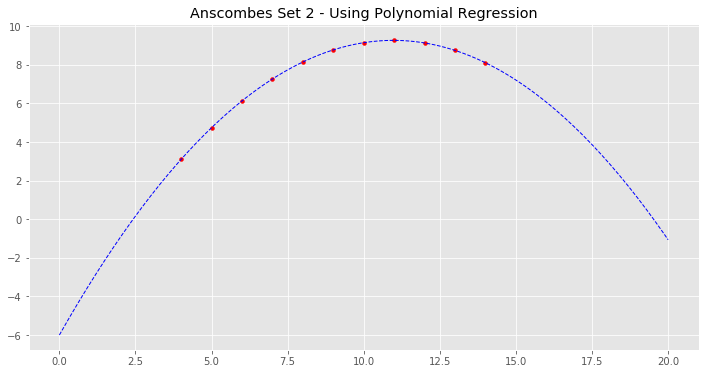

In [15]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [12, 6]

# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly = np.polyfit(df.loc[:,'x2'], df.loc[:,'y2'], 2) 

# Create a range of x values from 0 to 20 (the size of the plot)
x_poly = np.arange(0,20.1,0.1)
# Calculate the y values using the polyfit values created
y_poly = poly[0]*(x_poly**2) + poly[1]*(x_poly) + poly[2]
plt.plot(x_poly, y_poly, 'b-', linestyle='dashed',linewidth=1)

# plot the Anscombes set 2 data points for comparison
plt.scatter(df.loc[:, 'x2'], df.loc[:, 'y2'],c='red', label='Anscombes Set 2', s=15)
plt.title("Anscombes Set 2 - Using Polynomial Regression")
plt.show()

The plot above shows that rather than having a linear relationship, there is a quadratic relationship between x and y, in data set 2. In other cicumstances trial and error may be required usign the `numpy.polyfit()` function for higher and higher order functions to determine the relationship. The quadratic co-efficients are calculated by the polfit function and can be displyed as follows:

In [41]:
# Print the quadratic co-efficeints
print("The x-squared coefficient is: " + str(round(poly[0],2)))
print("The x coefficient is: " + str(round(poly[1],2)))
print("The y intercept is: " + str(round(poly[2],2)))

The x-squared coefficient is: -0.13
The x coefficient is: 2.78
The y intercept is: -6.0


The quadratic equation that best describes this relationship is:

$$
y = -0.13x^2 + 2.78x - 6.0
$$

### 5.3 Outlier Identification

Outliers are data point that distinctly seperate from the other data points in a data set [17]. Most descriptive statistics such as means, standard deviations, co-efficients of correlation (and any other statistical calculation based on these) are highly sensitive to outliers [18]. Some of the most common causes of outliers in a data set are [19]:

* Data entry errors (human errors)
* Measurement errors (instrument errors)
* Experimental errors (data extraction or experiment planning/executing errors)
* Intentional (dummy outliers made to test detection methods)
* Data processing errors (data manipulation or data set unintended mutations)
* Sampling errors (extracting or mixing data from wrong or various sources)
* Natural (not an error, novelties in data)

Because outliers can have such an impact on the calculation of descriptive statisics, it is a good idea to visualise a data set and try to determine whether on not there might be outliers in the set that are influencing you analysis.

In Anscombes quartet, visual plots of both set 3 and set 4 hint at the possibility that they might be influenced by outliers. In order to analyse these properly we need to take the following action:

* Plot the data sets and see if there are any possible outliers
* Use the inter-quartile range method to determine if these are, in fact, outliers
* Decide the course of action for dealing with the outliers
* Document the assumptions and decision making process 

We will follow these steps for set 3 and set 4 from the quartet. 

#### Plotting the data sets

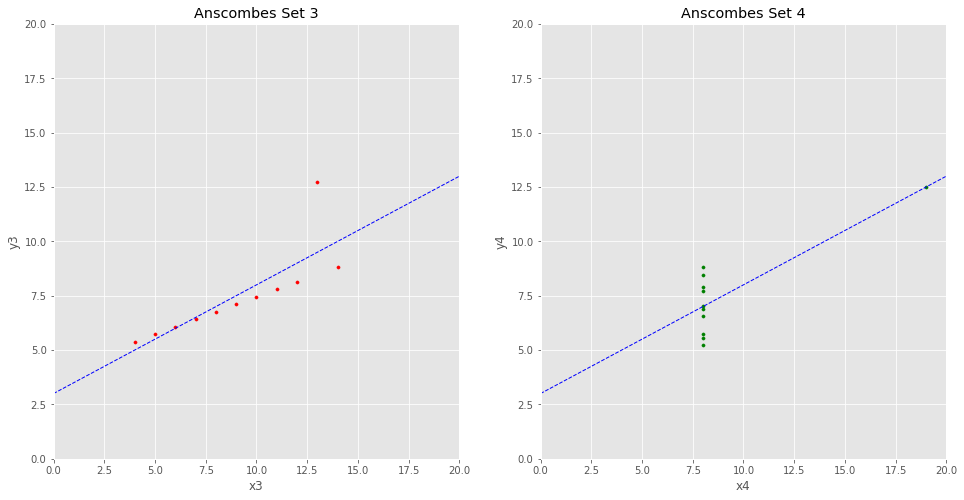

In [19]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [16, 8]

# Plot Set 3 from Anscombes Quartet as a subplot
# Plot the set
plt.subplot(1, 2, 1, xlim=(0,20), ylim=(0,20), xlabel=('x3'), ylabel=('y3'), title='Anscombes Set 3')
plt.scatter(df.loc[:, 'x3'], df.loc[:, 'y3'],c='red', label='Anscombes Set 3', s=10)
plt.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, 'x3'], df.loc[:, 'y3'])
# Create a range of x values from 0 to 20 (the size of the plot)
x_3 = np.arange(0,20.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_3 = slope * x_3 + intercept
plt.plot(x_3, y_3, 'b-', linestyle='dashed',linewidth=1)

# Plot Set 4 from Anscombes Quartet as a subplot
# Plot the set
plt.subplot(1, 2, 2, xlim=(0,20), ylim=(0,20), xlabel=('x4'), ylabel=('y4'), title='Anscombes Set 4')
plt.scatter(df.loc[:, 'x4'], df.loc[:, 'y4'],c='green', label='Anscombes Set 4', s=10)
plt.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, 'x4'], df.loc[:, 'y4'])
# Create a range of x values from 0 to 20 (the size of the plot)
x_4 = np.arange(0,20.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_4 = slope * x_4 + intercept
plt.plot(x_4, y_4, 'b-', linestyle='dashed',linewidth=1)


plt.show()

Looking at the 2 plots above it can be seen than both plots would appear to be influenced by outliers. For set 3 it appears that 10 of the 11 points in the set are co-linear but the point at (13, 12.74) seems to fall from the expected value, causing the linear regression line to be much steeper than it otherwise might be. 
For set 4, 10 of the 11 points are co-linear as they have the same x-value, 8. The other point (19, 12.5) is definitely having an influence on the analysis of this data set.

#### Use the interquartile range to determine if the points are outliers

There are various methods that can be used to determine whether or not a point is an outlier in a data set. One such method is [20]:
* Calculate the interquartile range (IQR) (this is the difference between the 75 percentile (Q3) and the 25 percentile (Q1))
* A point can be determined to be an outlier if it is greater that Q3 plus 1.5 times IQR, or if it is less than Q1 minus 1.5 times IQR

We can write a function in python and test the how these data points compare to the other x and y values in their respective data sets.

In [10]:
# Define a function to test if a data value is an outlier in a data set
def outlier(data_list, data_point):
    #Calculate q1, q3 and the iqr
    q1 = stats.scoreatpercentile(df.loc[:,data_list],25)
    q3 = stats.scoreatpercentile(df.loc[:,data_list],75)
    iqr = q3 - q1
    # Check to see if the data point is an outlier and print the result
    if data_point >= q3 + 1.5 * iqr:
        print(str(data_point) + " is an outlier of " + data_list)
    elif data_point<= q1 - 1.5 * iqr:
        print(str(data_point) + " is an outlier of " + data_list)
    else:
        print(str(data_point) + " is not an outlier of " + data_list)
        
# Check the point (13, 12.74) to see if is an outlier in either the x or y columns of set 3       
print("Check for outliers in set 3:")
outlier('x3', 13)    
outlier('y3', 12.74)  

# Check the point (19,12.5) to see if is an outlier in either the x or y columns of set 3 
print("Check for outliers in set 4:")
outlier('x4', 19)    
outlier('y4', 12.5)

Check for outliers in set 3:
13 is not an outlier of x3
12.74 is an outlier of y3
Check for outliers in set 4:
19 is an outlier of x4
12.5 is an outlier of y4


The above analysis has shown us the following:
* The suspect point in set 3 is an outlier of the y-values but not of the x-values
* The suspect point in set 4 is an outlier of both the y-values and the x-values

The next step is to look at what course of action can be taken to determine what course of action can be taken to limit the influence of these outliers.

#### Decide the course of action for dealing with outliers

In the course of researching this project, I read about many approaches for dealing with outliers. One of the things I took form this is that there are no hard and fast rules for how to approach it. However, it is not appropriate to drop an outlier simply because it is an outlier. In her blog post, Karen Grace Martin recommends the following approach [18]:

* If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier (example would be measuring weights of adult males and seeing one that is 20kg!)
* If the outlier does not change the results but does affect statistical assumptions, you may drop the outlier.  But note that in a footnote of your paper. (an example would be a co-linear data point that fits with the rest of the data but might be outside the range of the rest of the data)
* If the outlier affects both results and statistical assumptions, it is not legitimate to simply drop the outlier.  You may run the analysis both with and without it, but you should state in at least a footnote the dropping of any such data points and how the results changed (Anscombes set 3 would fall under this category)
* If the outlier creates a significant association, you should drop the outlier and should not report any significance from your analysis. (Anscombes set 4 would fall under this category)

The following course of action must be taken to properly analyse data sets 3 and 4 from the quartet:

* Set 3 - Analyse the data set both with and without the data outlier, report on the influence that the outlier has on the data set
* Set 4 - Drop the outlier, and only report on the clean data set

#### Handling the outliers in Anscombe's Data Set 3

In [47]:
# Create a small data frame from the main one
set3 = df[["x3", "y3"]]

# Calculate the new descriptive stats for the clean set
print("The mean and standard deviation for Anscombe set 3 are: ")
print(set3.describe().loc[['count','mean','std']])

# Create a new clean data set by removing the outlier
set3_clean = set3.drop(2)

# Calculate the new descriptive stats for the clean set
print("The mean and standard deviation for Anscombe set 3 (with the outlier removed) are: ")
print(set3_clean.describe().loc[['count','mean','std']])

The mean and standard deviation for Anscombe set 3 are: 
              x3         y3
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
The mean and standard deviation for Anscombe set 3 (with the outlier removed) are: 
              x3         y3
count  10.000000  10.000000
mean    8.600000   6.976000
std     3.204164   1.106689


Removing the outlier has reduced the mean of both the x3 and y3 values. It has also had a significant impact of the standard deviation of the y values reducing it from 2.03 to 1.11. The final step is to estimate the best fit line using linear regression for both the raw set and the cleaned set, and then to plot them against the original data points to compare them.

In [50]:
# Calculate the linear statistics for the raw data set
slope_s3, intercept_s3, r_value_s3, p_value_s3, std_err_s3 = stats.linregress(set3.loc[:, 'x3'], set3.loc[:, 'y3'])

# Print the best fit line for the clean data set 3:
print("The best fit line for the raw data set 3 is given by: y =  " + str(round(slope_s3,2)) + "x + " + str(round(intercept_s3,1)))

# Calculate the linear statistics for the clean data set
slope_s3c, intercept_s3c, r_value_s3c, p_value_s3c, std_err_s3c = stats.linregress(set3_clean.loc[:, 'x3'], set3_clean.loc[:, 'y3'])

# Print the best fit line for the clean data set 3:
print("The best fit line for the clean data set 3 is given by: y =  " + str(round(slope_s3c,2)) + "x + " + str(round(intercept_s3c,1)))

The best fit line for the raw data set 3 is given by: y =  0.5x + 3.0
The best fit line for the clean data set 3 is given by: y =  0.35x + 4.0


Now that we have the best fit lines for both data set, we can now plot them for comparison.

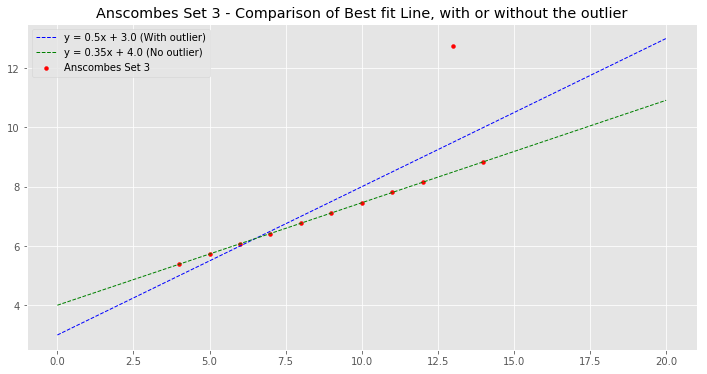

In [63]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [12, 6]

# Create a range of x values from 0 to 20 (the size of the plot)
x_set3 = np.arange(0,20.1,0.1)
# Calculate the y values for the raw set using the polyfit values created
y_set3 = slope_s3*x_set3 + intercept_s3
# Calculate the y values for the clean set using the polyfit values created
y_set3c = slope_s3c*x_set3 + intercept_s3c
# Plot the best ft lines for the raw and clean data
plt.plot(x_set3, y_set3, 'b-', linestyle='dashed',linewidth=1, label='y = 0.5x + 3.0 (With outlier)')
plt.plot(x_set3, y_set3c, 'g-', linestyle='dashed',linewidth=1, label='y = 0.35x + 4.0 (No outlier)')

# plot the Anscombes set 3 data points for comparison
plt.scatter(df.loc[:, 'x3'], df.loc[:, 'y3'],c='red', label='Anscombes Set 3', s=15)
plt.title("Anscombes Set 3 - Comparison of Best fit Line, with or without the outlier")
plt.legend()
plt.show()

It is now possible for an analyst to make an informed decision based on the data in set 3. Due to the cleaning and comparison it is now known what impact the outlier is having on the data set. It also known what the data set looklike without the outlier in it, and it may also be possible to decide based on this comparison whether it is a good idea or not to drop the outlier from the analysis.

#### Handling the outliers in Anscombe's Data Set 4

In this part, we will look at how to handle the outliers in Data Set 4. In this case we just drop the outlier and calculate the new statistics to describe the data set.

In [64]:
# Create a small data frame from the main one
set4 = df[["x4", "y4"]]

# Create a new clean data set by removing the outlier
set4_clean = set4.drop(7)

# Calculate the new descriptive stats for the clean set
print("The mean and standard deviation for Anscombe set 4 (with the outlier removed) are: ")
print(set4_clean.describe().loc[['count','mean','std']])

The mean and standard deviation for Anscombe set 4 (with the outlier removed) are: 
         x4         y4
count  10.0  10.000000
mean    8.0   7.001000
std     0.0   1.235695


Having removed the outlier from data set 4, we now have the true means and standard deviations for for the x and y data in set 4. Note the standard deviation in x is 0 which means there is no variance in the data. Knowing that the mean is 8 and having no variance means that the line that best fits this data will be:
$$
x = 8
$$
With no y intercept and infinite slope.

We can plot this against the clean data set.

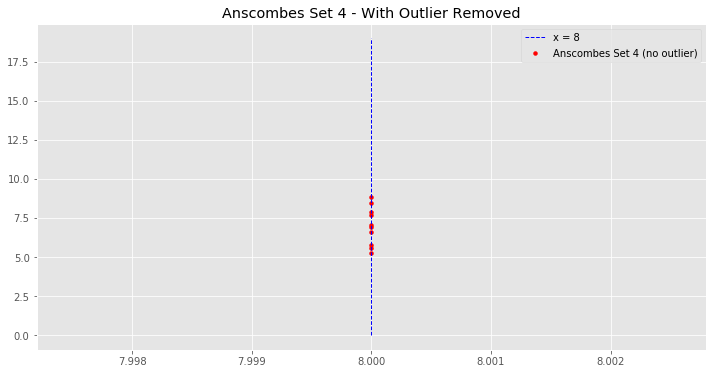

In [65]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [12, 6]

# Create a range of 20 x values (all = 8)
x_set4 = [8 for i in range(20)]
# Create a range of y values from 1 to 20
y_set4 = np.arange(0,20,1.0)
# Plot the best ft lines for the raw and clean data
plt.plot(x_set4, y_set4, 'b-', linestyle='dashed',linewidth=1, label='x = 8')
# plot the Anscombes set 4 data points for comparison
plt.scatter(set4_clean.loc[:, 'x4'], set4_clean.loc[:, 'y4'],c='red', label='Anscombes Set 4 (no outlier)', s=15)
plt.title("Anscombes Set 4 - With Outlier Removed")
plt.legend()
plt.show()

So we have demonstrated the effect that outliers can have on data anaytics and some of the ways in which they can be dealt with.

### 5.4 Other Descriptive Statistics

The last point for discussion is about the selecting the correct descriptive statistics that can fairly and accurately describe a data set allowing for useful comparisson between data sets. When Anscombe created the quartet of data sets he selected the mean, standard deviation and linear regression statistics in order to show a comparison between the data sets. In sections 5.1 and 5.2 I discussed the appropriateness of using the linear regression stats and when other stas might be more appropriate. In this section I will look at the mean and standard deviation to see if there might be other stats that provide a better desciption and comparisons of the data sets.

As described in section 4, may statisticians use the mean and standard deviation to a feel for the middle and the spread of data in a data set. In many cases they are very useful, but they both have a major drawback. They are both very heavily influenced by the presence of outliers in the data set, and in fact i would speculate that Anscombes picked these statistics because they are relatively easy to manipulte with the correct selection of outliers!

It was shown in section 5.3 that 2 of the 4 data sets have outliers in them so when comparing the data sets using descriptive statistics it might be better to use more robust statistics to describe them [14]. A more robust measure of the middle of a data set is the *median*. The median is 50th percentile, the point where 50% of the data point fall above it and 50% fall below. It is less susceptible to corruption by outliers that the mean.

Similarily a more robust measure of the spread of the data is the *inter-quartile range*, the difference between the value at the 75th percentile and the 25th percentile. As this will always look at the range between the middle 50% of data points, it is less likely to be corrupted by outliers. We can look at these stats in the next section.

In [71]:
# Create a data frame with the required descriptive statistics
desc_stats = df.describe().loc[['25%','50%','75%']]
# Use 75% and 25% to calculate the inter-quartile range
desc_stats.loc['IQR'] = desc_stats.loc['75%'] - desc_stats.loc['25%']
desc_stats.loc[['50%', 'IQR']]

,x1,x2,x3,x4,y1,y2,y3,y4
50%,9.0,9.0,9.0,8.0,7.580,8.140,7.11,7.04
IQR,5.0,5.0,5.0,0.0,2.255,2.255,1.73,2.02


While the median and IQR for the first 3 x-values are the same (9 and 5 respectively), we can see that the median of the x value in set 4 is lower and the IQR is 0 (remember the standard deviation was also 0 when we removed the outlier!).  We can also see that for the y-values there is variation in the medians as well as the IQR's which will help us compare the data sets without the influence of outliers bringing all of the statistics back to the same place.

## References

1. [1] Project Jupyter. Project Jupyter Home. (_https://www.jupyter.org/_)  
1. [2] Math Warehouse. What is Anscombes Quarter in Statistics? (_https://www.mathwarehouse.com/statistics/what-is-anscombes-quartet.php_)  
1. [3] Dr. Ian McLoughlin. GMIT. Assignment 2018: Fundamentals of Data Analysis (_https://github.com/ianmcloughlin/assignment-2018-fundda/raw/master/assignment.pdf_)  
1. [4] R data sets. Anscombe’s quartet of identical simple linear regressions. (_https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/anscombe.csv_)   
1. [5] Royal Statistical Society. Obituaries - Frank Ascombe (_https://rss.onlinelibrary.wiley.com/doi/full/10.1046/j.0039-0526.2003.02064.x_)    
1. [6] Wolfgang Saxon. New York Time Obituary (_https://www.nytimes.com/2001/10/25/nyregion/francis-john-anscombe-83-mathematician-and-professor.html_)  
1. [7] Justin Matejka, George Fitzmaurice. Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing. (_https://www.autodeskresearch.com/publications/samestats_)  
1. [8] Adrian Coyler. The Morning Paper: Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing. (_https://blog.acolyer.org/2017/10/31/same-stats-different-graphs-generating-datasets-with-varied-appearance-and-identical-statistics-through-simulated-annealing/_)  
1. [9] Lee Jacobson. The Problem Spot: Simulate Annealing for Beginners (_http://www.theprojectspot.com/tutorial-post/simulated-annealing-algorithm-for-beginners/6_)   
1. [10] Matplotlib Development Team. matplotlib.pyplot.subplots. (*https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html*)   
1. [11] Matplotlib Development Team. Customising plots with style sheets. (*https://matplotlib.org/users/style_sheets.html*)   
1. [12] Stackoverflow. How to make inline plots in Jupyter Notebook larger? (*https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger*)  
1. [13] www.plot.ly. Linear Fit in Matplotlib. (*https://plot.ly/matplotlib/linear-fits/*)    
1. [14] Deborah J. Rumsey, PhD. Statistics For Dummies 2nd Edition. Chapter 5. (ISBN - 9781119293521)
1. [15] www.statisticsbyjim.com. How to interpret R-squared in Regression Analysis. (*http://statisticsbyjim.com/regression/interpret-r-squared-regression/*)
1. [16] The Numpy Development Team. numpy.polyfit(). (*https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html*)
1. [17] www.mathwords.com. Outlier (*http://www.mathwords.com/o/outlier.htm*)
1. [18] www.theanalysisfactor.com. Outliers: to drop ot not to drop. (*https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/*) 
1. [19] www.towardsdatascience.com. A Brief Overview of Outlier Detection Techniques. (*https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561*)
1. [20] www.statisticshowto.datasciencecentral.com. Outliers: Finding Them in Data.(*https://www.statisticshowto.datasciencecentral.com/find-outliers/*)